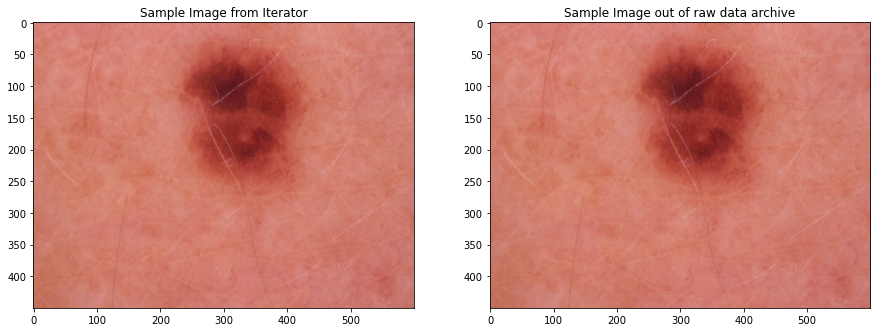

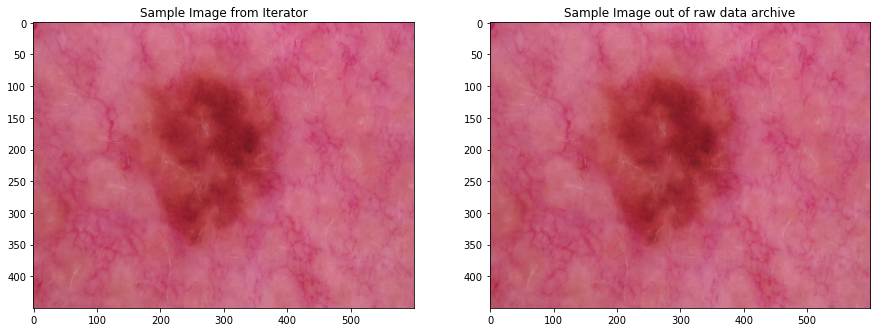

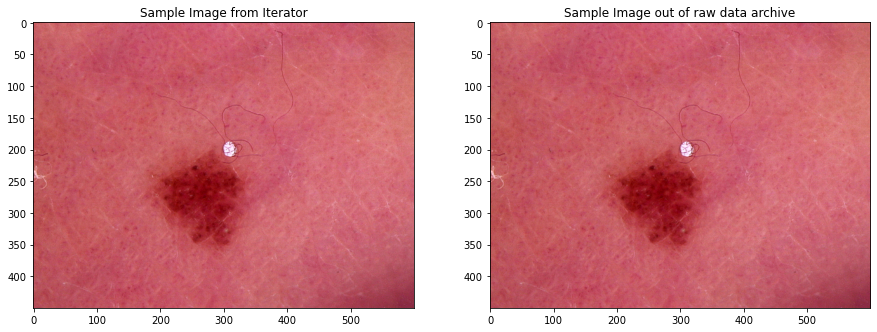

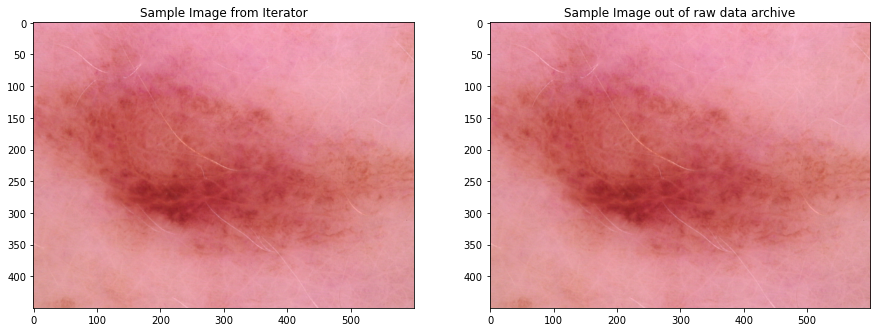

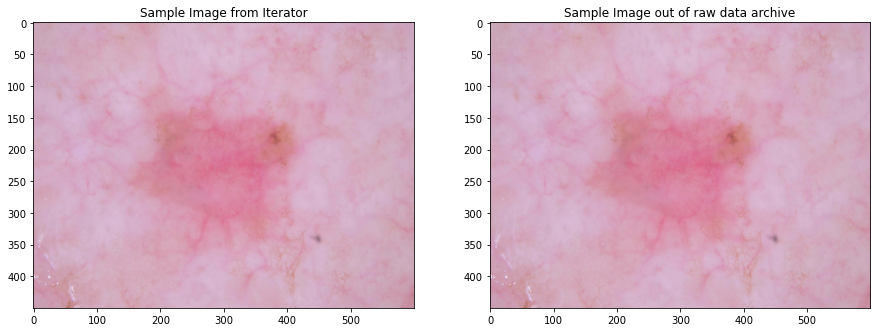

In [44]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from src.outlier_hub.datasets.ham10k.factory import HAMFactory
from data_stack.io.storage_connectors import StorageConnector, FileStorageConnector
import os
import random

# create an iterator
data_root = os.getcwd()
data_storage_path = os.path.join(data_root, "data")
storage_connector = FileStorageConnector(root_path=data_storage_path)
ham_factory = HAMFactory(storage_connector)
ham_iterator, _ = ham_factory.get_dataset_iterator(config={"split": "raw"})

# create a list of randomly selected samples out of the iterator
random_int = [random.randint(0,ham_iterator.__len__()) for i in range(5)]
random_samples = [ham_iterator[entry][0] for entry in random_int]

# get the filenames out of metadata from samples itself - bytetype
random_samples_names = [ham_iterator[entry][1][1] for entry in random_int]

# prepare root path for comparing images
raw_data_storage_path = os.path.join(data_storage_path, "raw")
raw_img_data_storage_path = os.path.join(raw_data_storage_path, "images")

# random_samples_names contains bytetype elements, convert it to clean strings
sample_file_names = [str(name)[2:14] + '.jpg' for name in random_samples_names]

compare_img_paths = [os.path.join(raw_img_data_storage_path, sample_file_names[i]) for i in range(5)]

for i in range(5):
    f = plt.figure(figsize=(15,15))
    f.add_subplot(1,2,1)
    plt.title('Sample Image from Iterator')
    plt.imshow(random_samples[i])

    f.add_subplot(1,2, 2)
    plt.title('Sample Image out of raw data archive')
    output = mpimg.imread(compare_img_paths[i])
    plt.imshow(output)
    plt.show()